In [2]:
# Import the required modules
import cv2
import time
import numpy as np
import PIL.Image
from io import BytesIO
import IPython.display
import ipywidgets as widgets
import threading
import pandas as pd
import numpy as np
import itertools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from string import ascii_lowercase




In [3]:
X = pd.read_csv("data/train.csv")
#X2 = pd.read_csv("data/test.csv")

#frames = [X1, X2]
#X = pd.concat(frames)
#X.index = [x for x in range(1, len(X.values)+1)]


y = X.pop("label")
y = to_categorical(y, num_classes = 26)

# Normalize the data
X = X / 255.0
X = X.values.reshape(-1,28,28,1)


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=1337)


In [5]:
X_train.shape

(21964, 28, 28, 1)

In [6]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(26, activation = "softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [8]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=86),
                              epochs = 5, validation_data = (X_valid,y_valid),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // 86
                             # , callbacks=[learning_rate_reduction]
                             )

Epoch 1/5
255/255 [==============================] - 4s 17ms/step - loss: 2.4377 - categorical_accuracy: 0.2593 - val_loss: 0.6847 - val_categorical_accuracy: 0.7988
Epoch 2/5
255/255 [==============================] - 4s 16ms/step - loss: 0.8990 - categorical_accuracy: 0.6950 - val_loss: 0.1724 - val_categorical_accuracy: 0.9547
Epoch 3/5
255/255 [==============================] - 4s 16ms/step - loss: 0.5115 - categorical_accuracy: 0.8238 - val_loss: 0.0615 - val_categorical_accuracy: 0.9840
Epoch 4/5
255/255 [==============================] - 4s 16ms/step - loss: 0.3657 - categorical_accuracy: 0.8763 - val_loss: 0.0329 - val_categorical_accuracy: 0.9964
Epoch 5/5
255/255 [==============================] - 4s 16ms/step - loss: 0.2624 - categorical_accuracy: 0.9105 - val_loss: 0.0136 - val_categorical_accuracy: 0.9985


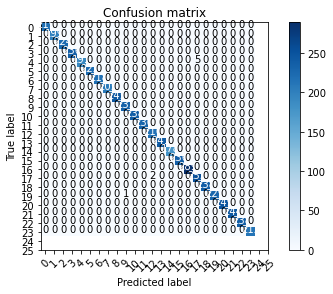

In [20]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix

plot_confusion_matrix(confusion_mtx, classes = range(26)) 

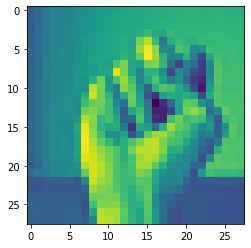

In [21]:

g = plt.imshow(X_train[3][:,:,0])

label: n predicted: n


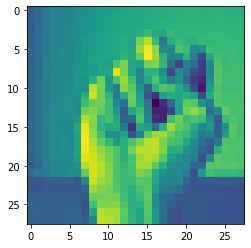

In [22]:
# predict results

predictnumber = 3
results = model.predict(X_train[[predictnumber]])

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

alphabet_string = ascii_lowercase
alphabet_list = list(alphabet_string)

g = plt.imshow(X_train[predictnumber][:,:,0])
print("label: " + str(alphabet_list[int(np.argmax(y_train[[predictnumber]],axis = 1))]) + " predicted: " + str(alphabet_list[int(results)]))

In [23]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, prev_display_id=None, fmt='jpeg'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    obj = IPython.display.Image(data=f.getvalue())
  
    if prev_display_id is not None:
        IPython.display.update_display(obj, display_id=prev_display_id)
        return prev_display_id
    else:

        return IPython.display.display(obj, display_id=True)

In [24]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    
    #flip image for natural viewing
#     frame = cv2.flip(frame, 1)
    
    return frame

In [25]:
def get_camera_indexes(max=10):
    # ref: https://stackoverflow.com/a/53310665/3553367
    arr = []
    for index in range(0, max):
#         print(index)
        cap = cv2.VideoCapture()
        cap.open(index)
        if cap.isOpened():
            arr.append(index)
        cap.release()
    return arr

In [26]:
camera_indexes = get_camera_indexes()

print(camera_indexes)

[0]


Output()

FloatProgress(value=0.0, max=1.0)

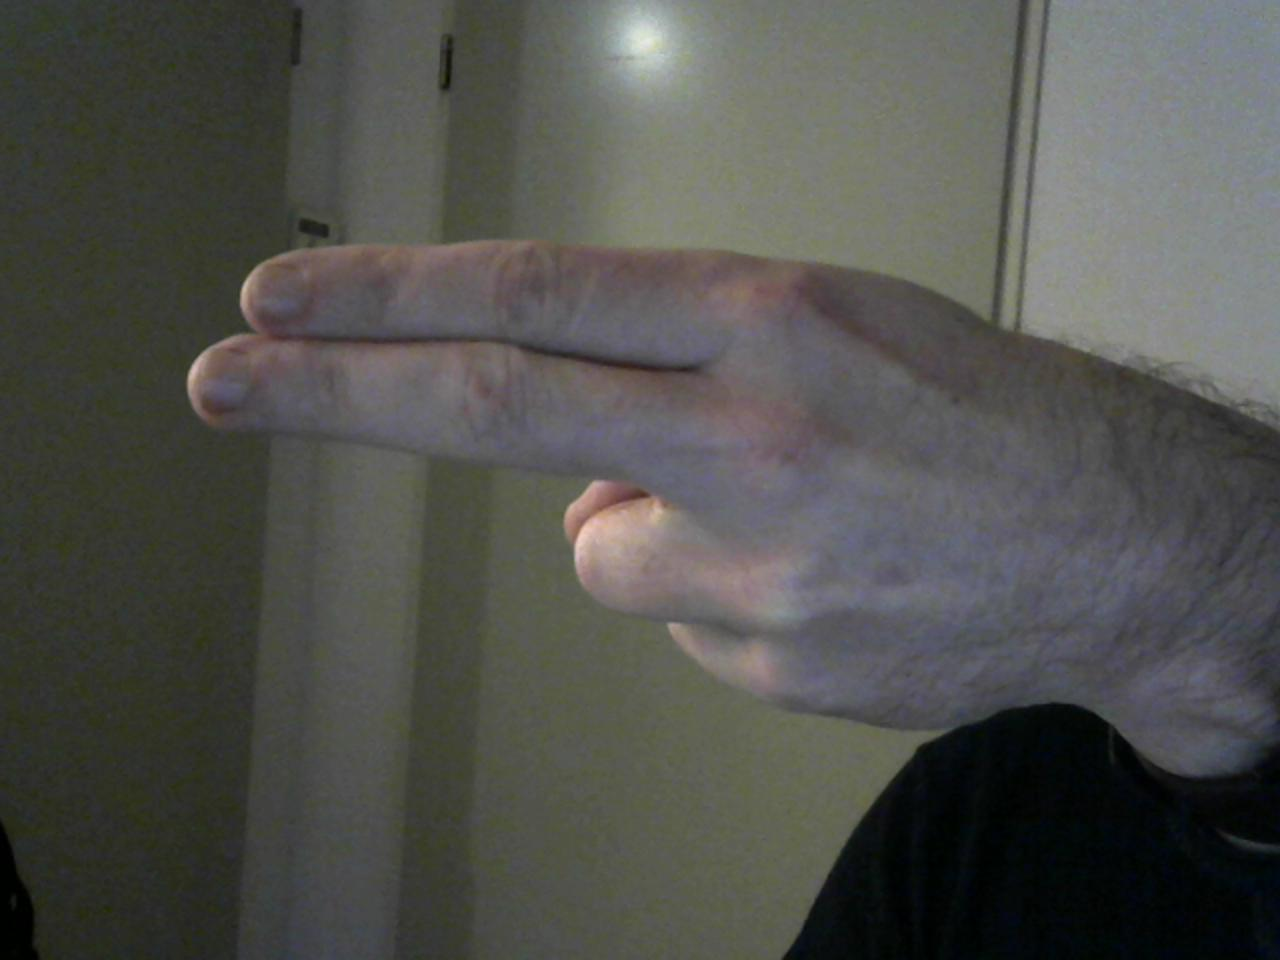

Stream stopped


In [102]:
cameras = []

def init_cameras():
    
    for camera_index in camera_indexes:

        cam = cv2.VideoCapture(camera_index)


        # cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
        # cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

    #    cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
    #    cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

        cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1024)
        cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1024)

    #     cam.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0.25) #ref: https://github.com/opencv/opencv/issues/9738#issuecomment-346584044
    #     cam.set(cv2.CAP_PROP_EXPOSURE, 0.01)
    #     cam.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0)
    #     cam.set(cv2.CAP_PROP_EXPOSURE, -4.0)

        cameras.append({
            "camera_index": camera_index,
            'cam': cam,
            'display_id': None,
        })
        
def stop_cameras():      
    for camera in cameras:
        cam = camera.get('cam')
        cam.release()
        
init_cameras()

total_cameras = len(camera_indexes)

frames_per_camera = 100

capture_image = False

fps_output = widgets.Output()
display(fps_output)

progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)

current_frame_number = 0

def work(progress):
    while current_frame_number is not frames_per_camera:
        time.sleep(1)
        progress.value = current_frame_number/frames_per_camera

thread = threading.Thread(target=work, args=(progress,))
display(progress)
thread.start()

for frame_number in range(1, frames_per_camera+1):
    current_frame_number = frame_number
    
    t1 = time.time()
        
    for camera_num, camera in enumerate(cameras):
        
        cam = camera.get('cam')

        # Capture frame-by-frame
        frame = get_frame(cam)

        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        display_id = camera.get('display_id')
 #       print(camera)
        if display_id is not None:
            showarray(frame, display_id)

        else:
           
            display_handle = showarray(frame)
            camera['display_id'] = display_handle.display_id
            
        
    t2 = time.time()

    #ref: https://github.com/jupyter-widgets/ipywidgets/issues/1744#issuecomment-335179855
    

        
#    with fps_output:
        #print("Camera: %d of %d" % (camera_num + 1, total_cameras))
        #print("Frame: %d of %d" % (frame_number, frames_per_camera))

        #print("%f FPS" % (1/(t2-t1)))
        # Display the frame info until new frame is available
        #IPython.display.clear_output(wait=True)

        

stop_cameras()        
    
with fps_output:
    print ("Stream stopped")
    
    


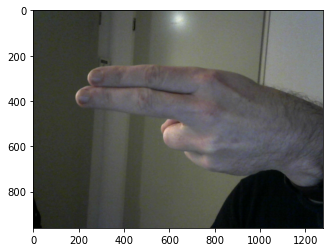

In [103]:
plt.imshow(frame)

In [104]:
#croppen
frame2 = frame[1:-1, 161:-161]

#normaliseren en resizen
fram2e = frame2.astype('float32')
frame2 = frame2 / 255

frame2 = cv2.resize(frame2, dsize=(28, 28), 
                 interpolation=cv2.INTER_CUBIC
                )
#kleuren weggooien
frame2 = np.mean(frame2, axis=2)
#ombouwen om het in het model te proppen
frame2 = frame2.reshape(1,28,28,1)


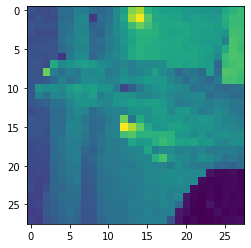

In [105]:
plt.imshow(frame2[0])

 predicted: p


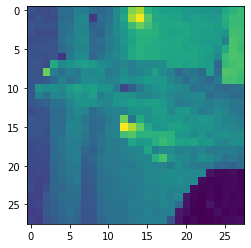

In [106]:

results2 = model.predict(frame2)
# select the indix with the maximum probability
results2 = np.argmax(results2,axis = 1)

alphabet_string = ascii_lowercase
alphabet_list = list(alphabet_string)

plt.imshow(frame2[0])
print(" predicted: " + str(alphabet_list[int(results2)]))